In [2]:
# CNN

In [4]:
#pip install tensorflow
#pip install fidle
#! pip install pwk 

In [6]:
import tensorflow  as tf 
from tensorflow import keras

import numpy as np 
import matplotlib.pyplot as plt 
import sys,os 
from importlib import reload
sys.path.append('..')
from tensorflow.keras.datasets import mnist

In [7]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

In [8]:
x_train=x_train.reshape(-1,28,28,1)
x_test=x_test.reshape(-1,28,28,1)

In [9]:
print(x_train.shape)


(60000, 28, 28, 1)


In [10]:
print('before normalization : Min={},Max={}'.format(x_train.min(),x_train.max()))
xmax=x_train.max()
x_train=x_train/xmax
x_test=x_test/xmax 
print('After normalization : Min={} , Min={} '.format(x_train.min(),x_train.max()))

before normalization : Min=0,Max=255
After normalization : Min=0.0 , Min=1.0 


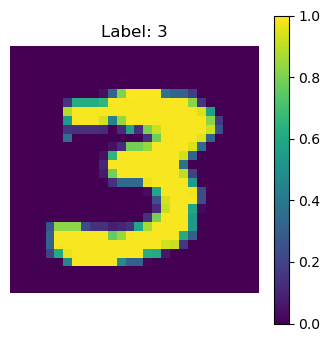

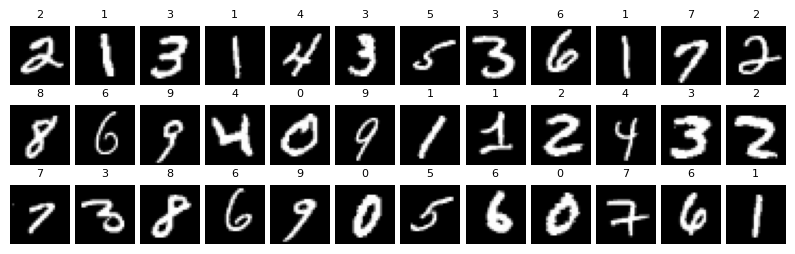

In [11]:
import matplotlib.pyplot as plt

# Première ligne - une seule image
plt.figure(figsize=(4, 4)) 
plt.imshow(x_train[27], cmap='viridis')
plt.colorbar()
plt.title(f"Label: {y_train[27]}")
plt.axis('off')  
plt.savefig('01-one-digit.png', bbox_inches='tight', pad_inches=0) 
plt.show()


fig = plt.figure(figsize=(10, 3))  
for i, idx in enumerate(range(5, 41)):
    ax = plt.subplot(3, 12, i + 1) 
    ax.imshow(x_train[idx], cmap='gray')
    ax.axis('off') 
    ax.set_title(y_train[idx], fontsize=8)  
plt.subplots_adjust(wspace=0.1, hspace=0.1)  
plt.savefig('02-many-digits.png', bbox_inches='tight', pad_inches=0)  
plt.show()

In [12]:
hidden1=100
hidden2=100
model=keras.models.Sequential()

model.add(keras.layers.Input((28,28,1)))

model.add(keras.layers.Conv2D(8,(3,3),activation ='relu'))
model.add(keras.layers.MaxPooling2D(2,2))
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Conv2D(16,(3,3),activation='relu'))
model.add(keras.layers.MaxPooling2D(2,2,))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(10,activation='softmax'))


In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 8)      │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 13, 13, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5, 5, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │        40,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,358 (165.46 KB)

 Trainable params: 42,358 (165.46 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
batch_size=512
epochs=16

history=model.fit(x_train, y_train,
                  batch_size=batch_size,
                  epochs=epochs,
                  verbose=1,
                  validation_data=(x_test,y_test))

Epoch 1/16
118/118 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.3564 - loss: 1.8210 - val_accuracy: 0.9153 - val_loss: 0.3579
Epoch 2/16
118/118 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.8113 - loss: 0.5920 - val_accuracy: 0.9503 - val_loss: 0.1848
Epoch 3/16
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.8753 - loss: 0.3980 - val_accuracy: 0.9603 - val_loss: 0.1347
Epoch 4/16
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.9014 - loss: 0.3239 - val_accuracy: 0.9676 - val_loss: 0.1112
Epoch 5/16
118/118 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.9155 - loss: 0.2730 - val_accuracy: 0.9715 - val_loss: 0.0953
Epoch 6/16
118/118 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.9244 - loss: 0.2468 - val_accuracy: 0.9741 - val_loss: 0.0840
Epoch 7/16
118/118 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.9290 - loss: 0.2319 - val_accuracy: 0.9771 - val_loss: 0.0772
Epoch 8/16
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.9343 - loss: 0.2228 - val_accu

In [16]:
score=model.evaluate(x_test,y_test,verbose=0)
print( f'Test Loss      :{score[0]:4.4f}')
print( f'Test accuracy  :{score[1]:4.4f}')

Test Loss      :0.0476
Test accuracy  :0.9855


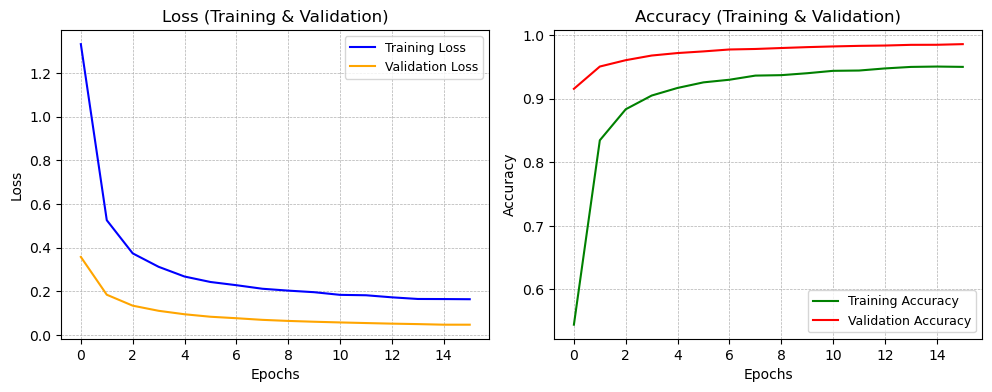

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', color='blue', linewidth=1.5)
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange', linewidth=1.5)
plt.title('Loss (Training & Validation)', fontsize=12)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.legend(loc='upper right', fontsize=9)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout(pad=1.0)
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='green', linewidth=1.5)
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red', linewidth=1.5)
plt.title('Accuracy (Training & Validation)', fontsize=12)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.legend(loc='lower right', fontsize=9)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout(pad=1.0)  # Minimiser les marges
plt.show()